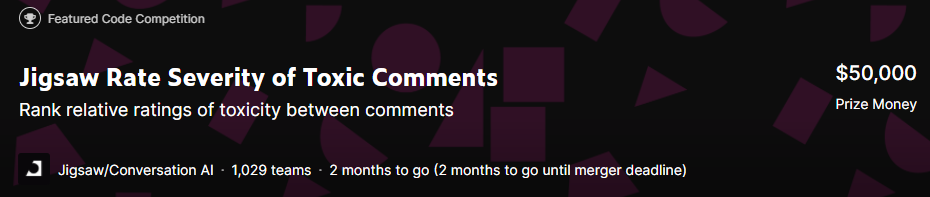



### The feature of this competition is a natural language task for which <font color='orange'>no learning data is provided.</font>
### For the learning data, see the following three competitions.
### Toxic Comment Classification Challenge, Jigsaw Unintended Bias in Toxicity Classification, Jigsaw Multilingual Toxic Comment Classification
### Somehow unfriendly competition.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">Import</span>

In [ ]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
import gc
from tqdm.notebook import tqdm
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
train =False

### メモリリークを解決できなかったので、trainフラグを付けました。

### I couldn't resolve the memory leak, so I flagged it as train.

### First, let's take a look at the data provided

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">comments_to_score.csv</span>

In [ ]:
    comments = pd.read_csv('../input/jigsaw-toxic-severity-rating/comments_to_score.csv')
    comments

### You need to look at this text to determine if it is harmful.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">validation_data.csv</span>

In [ ]:
if train:
    validation = pd.read_csv('../input/jigsaw-toxic-severity-rating/validation_data.csv')
    validation

### It is not the training data, but the data that verifies the trained model.



There is a lot of data that needs to be removed. \ n!? "And so on.

<span style="color: orange; font-family: Segoe UI; font-size: 1.9em; font-weight: 300;">sample_submission.csv</span>

In [ ]:
sample = pd.read_csv('../input/jigsaw-toxic-severity-rating/sample_submission.csv')
sample

### This is the submission file. Whether it is harmful or not will be entered in this score column.



### <font color='orange'><u> There is nothing we can do without learning data, so we will collect the data. </u></font>

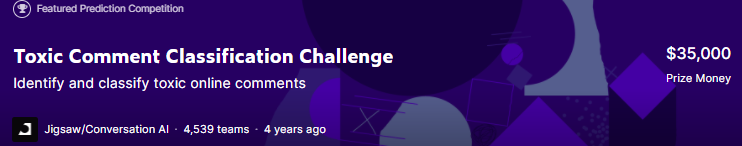



### I feel that comment_text and toxic of this learning data can be used.

In [ ]:
if train:
    train1 =pd.read_csv('../input/old-competitaion/train.csv/train.csv')
    train1

In [ ]:
if train:
    check1 =train1[['comment_text','toxic','severe_toxic']]
    check1
    del train1



This data is represented by 0,1 whether it is harmful to the text.



### Since you will run out of memory, leave only the necessary data and erase the rest

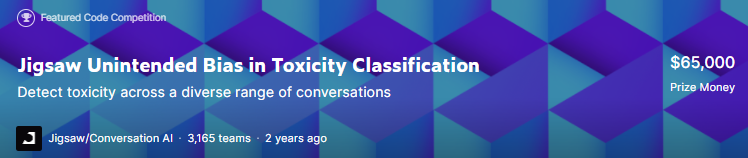

In [ ]:
if train:
    train2 = pd.read_csv('../input/old-competitaion/compe2/compe2/train.csv')
    train2



Severe_toxicity is expressed in the range of 0-1 but it is most often around 0.1.



Since toxicity_annotator_count is the number of characters, it is difficult to evaluate it, but for the time being, it seems that 500 or less harmful characters are included in this data.

In [ ]:
if train:
    anno = pd.read_csv('../input/old-competitaion/compe2/compe2/toxicity_individual_annotations.csv')
    anno

In [ ]:
if train:
    anno.toxic.unique()



Merge train and anno.

In [ ]:
if train:
    anno_ =anno[anno.duplicated(subset='id')!=True]
    anno_

In [ ]:
if train:
    train2 = train2.merge(anno_,on='id')
    train2

In [ ]:
if train:
    check2 =train2[['comment_text','severe_toxicity','toxicity_annotator_count','toxic']]
    check2



toxic is represented by 0,1.

In [ ]:
if train:
    anno2 = pd.read_csv('../input/old-competitaion/compe2/compe2/identity_individual_annotations.csv')
    anno2
    del train2
    del anno
    del anno2
    del anno_



I'm not sure if this can be used at this time.

In [ ]:
if train:
    all_ = pd.read_csv('../input/old-competitaion/compe2/compe2/all_data.csv')
    all_

In [ ]:
if train:
    all_.columns

In [ ]:
if train:
    all_.toxicity.hist()



toxicity is expressed in the range of 0-1 but it is most often around 0.1.

In [ ]:
if train:
    check3 =all_[['comment_text','toxicity','severe_toxicity','toxicity_annotator_count']]
    check3



Severe_toxicity is expressed in the range of 0-1 but it is most often around 0.1.

In [ ]:
if train:
    del all_

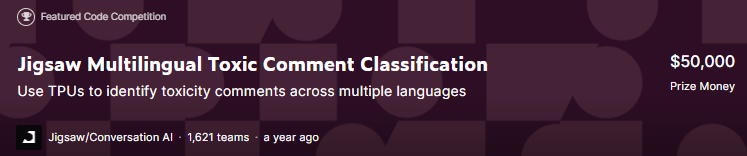

In [ ]:
if train:
    jig1 = pd.read_csv('../input/old-competitaion/compe3/compe3/jigsaw-toxic-comment-train-processed-seqlen128.csv')
    jig1

In [ ]:
if train:
    jig1.toxic.unique()



toxic is represented by 0,1.

In [ ]:
if train:
    check4 =jig1[['comment_text','severe_toxic','toxic']]
    del jig1
    check4

In [ ]:
if train:
    jig2 = pd.read_csv('../input/old-competitaion/compe3/compe3/jigsaw-toxic-comment-train.csv')
    jig2

In [ ]:
if train:
    jig2.toxic.unique()



toxic is represented by 0,1.

In [ ]:
if train:
    check4 =jig2[['comment_text','toxic','severe_toxic']]
    del jig2
    check4

In [ ]:
if train:
    jig3 = pd.read_csv('../input/old-competitaion/compe3/compe3/jigsaw-unintended-bias-train.csv')
    jig3

In [ ]:
if train:
    jig3.toxic.hist()



toxic is expressed in the range of 0-1 but it is most often around 0.1.

In [ ]:
if train:
    jig3.severe_toxicity.hist()



Severe_toxicity is expressed in the range of 0-1 but it is most often around 0.1.

In [ ]:
if train:
    jig3.columns

In [ ]:
if train:
    check5 =jig3[['comment_text','toxic', 'severe_toxicity','toxicity_annotator_count']]
    del jig3
    check5

In [ ]:
if train:
    jig4 = pd.read_csv('../input/old-competitaion/compe3/compe3/validation.csv')
    jig4

In [ ]:
if train:
    jig4.toxic.unique()



toxic is represented by 0,1.

In [ ]:
if train:
    check6 =jig4[['comment_text','toxic']]
    del jig4
    check6


### I came to this point and found that there are three types of data.
### Whether it is harmful or not It is expressed by 0,1, in the range of 0-1 and by the number of characters.
### It is necessary to put together as learning data.

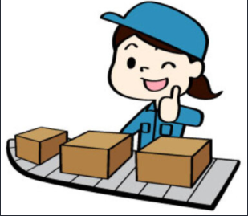

------------------------------



### check1 and check4 can be combined

In [ ]:
if train:
    data1 = pd.concat([check1,check4]).reset_index(drop=True)
    del check1
    del check4
    data1



### check3 and check5 can be combined. The line names are different, so you need to change them.

In [ ]:
if train:
    check3 =check3.rename(columns={'toxicity':'toxic'})

In [ ]:
if train:
    data2 = pd.concat([check3,check5]).reset_index(drop=True)
    del check3
    del check5
    data2



### check2 and check6 cannot be combined, so leave them as they are.

In [ ]:
if train:
    data3 =check2
    data3

In [ ]:
if train:
    data4= check6
    data4

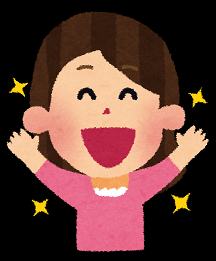



### data1-data4 is ready.

In [ ]:
if train:
    data1 = data1[['comment_text','toxic']]
    data1

In [ ]:
if train:
    data2 = data2[['comment_text','toxic']]
    data2

In [ ]:
if train:
    data3 =data3[['comment_text','toxic']]
    data3

英語ではない

It's not English.

In [ ]:
if train:
    data4

# Data Merge

英語ではないdata4は外す。

Remove data4 which is not in English.

In [ ]:
if train:
    data1= pd.concat([data1,data2,data3]).reset_index(drop=True)
    del data2
    del data3
    del data4

---------------------



There is still a lot of garbage. I think there was a good way, but I forgot. I will investigate this time. First of all, I will erase it manually

In [ ]:
def clean(data, col):
    
    data[col] = data[col].str.replace('https?://\S+|www\.\S+', ' social medium ')      
        
    data[col] = data[col].str.lower()
    data[col] = data[col].str.replace("4", "a") 
    data[col] = data[col].str.replace("2", "l")
    data[col] = data[col].str.replace("5", "s") 
    data[col] = data[col].str.replace("1", "i") 
    data[col] = data[col].str.replace("!", "i") 
    data[col] = data[col].str.replace("|", "i") 
    data[col] = data[col].str.replace("0", "o") 
    data[col] = data[col].str.replace("l3", "b") 
    data[col] = data[col].str.replace("7", "t") 
    data[col] = data[col].str.replace("7", "+") 
    data[col] = data[col].str.replace("8", "ate") 
    data[col] = data[col].str.replace("3", "e") 
    data[col] = data[col].str.replace("9", "g")
    data[col] = data[col].str.replace("6", "g")
    data[col] = data[col].str.replace("@", "a")
    data[col] = data[col].str.replace("$", "s")
    data[col] = data[col].str.replace("#ofc", " of fuckin course ")
    data[col] = data[col].str.replace("fggt", " faggot ")
    data[col] = data[col].str.replace("your", " your ")
    data[col] = data[col].str.replace("self", " self ")
    data[col] = data[col].str.replace("cuntbag", " cunt bag ")
    data[col] = data[col].str.replace("fartchina", " fart china ")    
    data[col] = data[col].str.replace("youi", " you i ")
    data[col] = data[col].str.replace("cunti", " cunt i ")
    data[col] = data[col].str.replace("sucki", " suck i ")
    data[col] = data[col].str.replace("pagedelete", " page delete ")
    data[col] = data[col].str.replace("cuntsi", " cuntsi ")
    data[col] = data[col].str.replace("i'm", " i am ")
    data[col] = data[col].str.replace("offuck", " of fuck ")
    data[col] = data[col].str.replace("centraliststupid", " central ist stupid ")
    data[col] = data[col].str.replace("hitleri", " hitler i ")
    data[col] = data[col].str.replace("i've", " i have ")
    data[col] = data[col].str.replace("i'll", " sick ")
    data[col] = data[col].str.replace("fuck", " fuck ")
    data[col] = data[col].str.replace("f u c k", " fuck ")
    data[col] = data[col].str.replace("shit", " shit ")
    data[col] = data[col].str.replace("bunksteve", " bunk steve ")
    data[col] = data[col].str.replace('wikipedia', ' social medium ')
    data[col] = data[col].str.replace("faggot", " faggot ")
    data[col] = data[col].str.replace("delanoy", " delanoy ")
    data[col] = data[col].str.replace("jewish", " jewish ")
    data[col] = data[col].str.replace("sexsex", " sex ")
    data[col] = data[col].str.replace("allii", " all ii ")
    data[col] = data[col].str.replace("i'd", " i had ")
    data[col] = data[col].str.replace("'s", " is ")
    data[col] = data[col].str.replace("youbollocks", " you bollocks ")
    data[col] = data[col].str.replace("dick", " dick ")
    data[col] = data[col].str.replace("cuntsi", " cuntsi ")
    data[col] = data[col].str.replace("mothjer", " mother ")
    data[col] = data[col].str.replace("cuntfranks", " cunt ")
    data[col] = data[col].str.replace("ullmann", " jewish ")
    data[col] = data[col].str.replace("mr.", " mister ")
    data[col] = data[col].str.replace("aidsaids", " aids ")
    data[col] = data[col].str.replace("njgw", " nigger ")
    data[col] = data[col].str.replace("wiki", " social medium ")
    data[col] = data[col].str.replace("administrator", " admin ")
    data[col] = data[col].str.replace("gamaliel", " jewish ")
    data[col] = data[col].str.replace("rvv", " vanadalism ")
    data[col] = data[col].str.replace("admins", " admin ")
    data[col] = data[col].str.replace("pensnsnniensnsn", " penis ")
    data[col] = data[col].str.replace("pneis", " penis ")
    data[col] = data[col].str.replace("pennnis", " penis ")
    data[col] = data[col].str.replace("pov.", " point of view ")
    data[col] = data[col].str.replace("vandalising", " vandalism ")
    data[col] = data[col].str.replace("cock", " dick ")
    data[col] = data[col].str.replace("asshole", " asshole ")
    data[col] = data[col].str.replace("youi", " you ")
    data[col] = data[col].str.replace("afd", " all fucking day ")
    data[col] = data[col].str.replace("sockpuppets", " sockpuppetry ")
    data[col] = data[col].str.replace("iiprick", " iprick ")
    data[col] = data[col].str.replace("penisi", " penis ")
    data[col] = data[col].str.replace("warrior", " warrior ")
    data[col] = data[col].str.replace("loil", " laughing out insanely loud ")
    data[col] = data[col].str.replace("vandalise", " vanadalism ")
    data[col] = data[col].str.replace("helli", " helli ")
    data[col] = data[col].str.replace("lunchablesi", " lunchablesi ")
    data[col] = data[col].str.replace("special", " special ")
    data[col] = data[col].str.replace("ilol", " i lol ")
    data[col] = data[col].str.replace("'", "")
    data[col] = data[col].str.replace('"', '')
    data[col] = data[col].str.replace(',', ' ')
    data[col] = data[col].str.replace(r'\b[uU]\b', 'you')
    data[col] = data[col].str.replace(r"what's", "what is ")
    data[col] = data[col].str.replace(r"\'s", " is ")
    data[col] = data[col].str.replace(r"\'ve", " have ")
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ")
    data[col] = data[col].str.replace(r"\'d", " would ")
    data[col] = data[col].str.replace(r"\'ll", " will ")
    data[col] = data[col].str.replace(r"\'scuse", " excuse ")
    data[col] = data[col].str.replace('\s+', ' ')  # will remove more than one whitespace character
#     text = re.sub(r'\b([^\W\d_]+)(\s+\1)+\b', r'\1', re.sub(r'\W+', ' ', text).strip(), flags=re.I)  # remove repeating words coming immediately one after another
    data[col] = data[col].str.replace(r'(.)\1+', r'\1\1') # 2 or more characters are replaced by 2 characters
#     text = re.sub(r'((\b\w+\b.{1,2}\w+\b)+).+\1', r'\1', text, flags = re.I)
    data[col] = data[col].str.replace("[:|♣|'|§|♠|*|/|?|=|%|&|-|#|•|~|^|>|<|►|_]", '')
    
    
    data[col] = data[col].str.replace(r"what's", "what is ")    
    data[col] = data[col].str.replace(r"\'ve", " have ")
    data[col] = data[col].str.replace(r"can't", "cannot ")
    data[col] = data[col].str.replace(r"n't", " not ")
    data[col] = data[col].str.replace(r"i'm", "i am ")
    data[col] = data[col].str.replace(r"\'re", " are ")
    data[col] = data[col].str.replace(r"\'d", " would ")
    data[col] = data[col].str.replace(r"\'ll", " will ")
    data[col] = data[col].str.replace(r"\'scuse", " excuse ")
    data[col] = data[col].str.replace(r"\'s", " ")
    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    #data[col] = data[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    
    return data

In [ ]:
    def text_cleaning(text):
        #template = re.compile(r'https?://\S+|www\.\S+')  # Removes website links
        #text = template.sub(r'', text)
    
        #soup = BeautifulSoup(text, 'lxml')  # Removes HTML tags
        #only_text = soup.get_text()
        #text = only_text
        
        text = re.sub('[^A-Za-z0-9]+', ' ', str(text).lower()).strip()
        text = re.sub(' +', ' ', text)
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # 顔文字
                                   u"\U0001F300-\U0001F5FF"  # 記号と絵文字
                                   u"\U0001F680-\U0001F6FF"  # 交通及び地図記号
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)
        text = re.sub(r"[^a-zA-Z\d]", " ", text) 
        text = re.sub(' +', ' ', text) 
        text = text.strip().lower() 
    
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split(' ')])
        text = ' '.join([word for word in text.split(' ') if word not in stop])

        return text

# stopwords

In [ ]:
import re
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
stop = stopwords.words("english")

In [ ]:
if train:
    del data1
    del check2
    del check6
    del validation
    gc.collect()

In [ ]:
if train:
    test = clean(data1, 'comment_text')
    temp = test.comment_text.apply(text_cleaning)
    test.comment_text =temp.values
    test.toxic = data1.toxic

    test.to_csv('train_data.csv', index=False)


In [ ]:
if train==False:
    test = pd.read_csv('../input/jigsaw/train_data.csv')

In [ ]:
test

In [ ]:
if train==False:
    test = test.dropna()
    test = test[:len(test)//6]

----------------------------------------------------------

# TF-IDF

In [ ]:
if train==False:
    from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
    vec = TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))
    X = vec.fit_transform(test['comment_text'])
        

### Train

In [ ]:
if train==False:
    from sklearn.linear_model import Ridge, Lasso, BayesianRidge
    model = Ridge(alpha=0.5)
    model.fit(X, test['toxic'])

### comments pred

In [ ]:
if train==False:
    import re
    pred = pd.DataFrame()
    pred['comment_text'] = comments.text.apply(text_cleaning)


In [ ]:
if train==False:
    pred = clean(pred, 'comment_text')
    pred.comment_text = pred.comment_text.apply(text_cleaning)
    pred

In [ ]:
if train==False:
    X_test = vec.transform(pred.comment_text.values)
    toxic = model.predict(X_test)


In [ ]:
if train==False:
    sample.score = toxic 
    sample

In [ ]:
if train==False:
    sample.to_csv("submission.csv", index=False)

In [ ]:
import sys
print("{}{:>25}{}{:>10}{}".format('|','Variable Name','|','memory','|'))
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000:
        print("{}{:>25}{}{:>10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))

In [ ]:
#model, tokenizer, \
#        test_loader, scaler = config(fold=1, model_name='../input/roberta/', load_model_path='../input/jigsaw-roberta-base-i/')

-------------------------------------